<a href="https://colab.research.google.com/github/jasminl/chaos/blob/main/chatper4_box_counting_dimension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Chapter 4. Box counting dimension</h1>

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random

from math import pi

<h2>Define functions</h2>

In [6]:

def count_box(x, y, eps):
  """
  Covers the number of boxes in one possible covering of 2D points. The points
  are covered with squares.

  Arguments:
  ----------
  x, y Lists of x- and y- coordinates of the set for which to cover
  eps:
  """
  xmin, xmax = min(x), max(x)
  ymin, ymax = min(y), max(y)

  # Number of boxes along the x-axis
  nx = np.ceil((xmax - xmin)/eps) + 1

  box_id = set()
  for cx, cy in zip(x, y):
    ix = np.floor((cx - xmin)/eps)
    iy = np.floor((cy - ymin)/eps)
    idx = iy * nx + ix  # Convert 2D index to linear index
    if idx not in box_id:
      box_id.add(idx)

  return len(box_id)

def make_shape(num_points, point, factor):
  """ Runs the iterated functions, starts at a random point in the unit square.

  Arguments:
  num_points: The number of iterations
  point: A list of pairs of (x, y) coordinates for corners of the shape
  factor: The number by which to divide the distance at each iteration

  Returns:
  x, y: Lists of x- and y- coordinates for each iteration, plot with scatter

  """

  # Initial random point
  x = [np.random.rand(1,)[0]]
  y = [np.random.rand(1,)[0]]

  for i in range(num_points):
    idx = random.randint(0, len(point)-1)
    dx = (point[idx][0] - x[-1])/factor
    dy = (point[idx][1] - y[-1])/factor
    x.append(x[-1] + dx)
    y.append(y[-1] + dy)
  return x, y

In [7]:
# Test on a simple case of three points: dimension should be tending to zero as
# the box size tends to zero (as it would for any finite set of points)

# Single point, dimension should be zero
x = [0, 0, 0]
y = [0, 1, 2]
eps = np.linspace(0.00000001, 0.01, 10)
num_box = [count_box(x, y, e) for e in eps]
d = np.log2(num_box) / np.log2(1/eps)
print(d)

[0.05964016 0.16150394 0.17982786 0.19261125 0.20284198 0.21155817
 0.21925611 0.22621555 0.23261131 0.23856063]


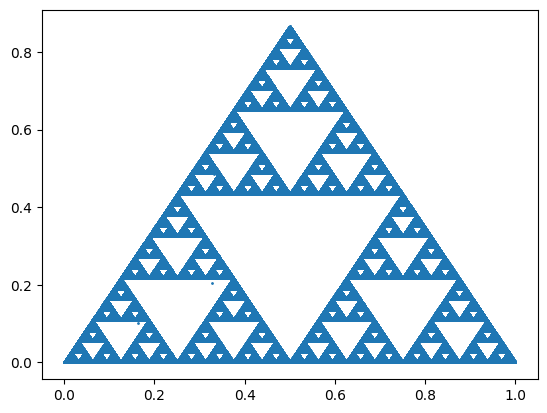

In [8]:
# Define equilateral triangle vertices

a = (0, 0)
b = (1, 0)
c = (0.5, 0.5 * np.tan(pi/3))
point = [a, b, c]

num_points = 1000000  # Use a really large number of points to mimick the attractor set

# Run iterations
x, y = make_shape(num_points, point, 2)

# Display
plt.scatter(x, y, s=1)
plt.show()


<h2>Count number of boxes</h2>
Here it is important that we don't make the covering box too small, because this eventually results in the dimension converging to 0, which is just an artifact of using a finite number of points generated from the iterative functions.

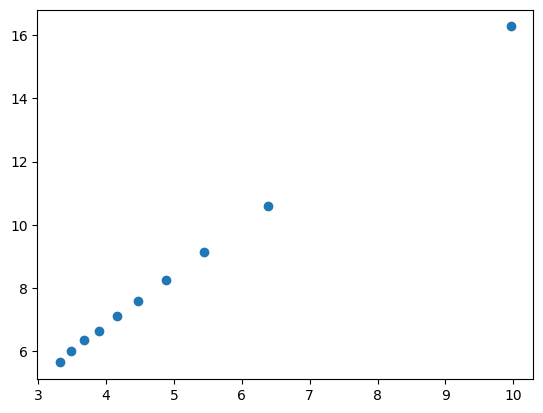

[1.58843173 0.46708539]
[1.63297601 1.65989942 1.68171829 1.68877858 1.69871027 1.71193026
 1.70368607 1.72260648 1.71917266 1.69897   ]


In [14]:
eps = np.linspace(0.001, 0.1, 10)
num_box = [count_box(x, y, e) for e in eps]

# Draw scatter plot, the rightmost point corresponds to when the box is smallest
plt.scatter(np.log2(1/eps), np.log2(num_box))
plt.show()

# Fit a line
line = np.polyfit(np.log2(1/eps), np.log2(num_box), 1)
print(line)  # First coefficient is the slope, which should ~ the dimension

# Print the approximated dimension (separate from the linefit to double-check)
print(np.log2(num_box) / np.log2(1/eps))

<h2>Compare with actual box counting dimension</h2>

In the case of the Sierpinski gasket, we know what the actual dimension is since it can be computed in closed form: ln(3) / ln(2).

The number here should be roughly equivalent to the approximations computed above.

In [10]:
print(np.log2(3) / np.log2(2))

1.584962500721156


The slope fits at two digits with the actual dimension.